# 2. Predicting who will survive on the Titanic with logistic regression

In [16]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
train = pd.read_csv('https://github.com/ipython-books'
                    '/cookbook-2nd-data/blob/master/'
                    'titanic_train.csv?raw=true')
test = pd.read_csv('https://github.com/ipython-books/'
                   'cookbook-2nd-data/blob/master/'
                   'titanic_test.csv?raw=true')

In [18]:
train[train.columns[[2, 4, 5, 1]]].head()

Pclass     Sex   Age  Survived
0       3    male  22.0         0
1       1  female  38.0         1
2       3  female  26.0         1
3       1  female  35.0         1
4       3    male  35.0         0

In [19]:
data = train[['Age', 'Pclass', 'Survived']]
# Add a 'Female' column.
data = data.assign(Female=train['Sex'] == 'female')
# Reorder the columns.
data = data[['Female', 'Age', 'Pclass', 'Survived']]
data = data.dropna()
data.head()

Female   Age  Pclass  Survived
0   False  22.0       3         0
1    True  38.0       1         1
2    True  26.0       3         1
3    True  35.0       1         1
4   False  35.0       3         0

In [20]:
data_np = data.astype(np.int32).values
X = data_np[:, :-1]
y = data_np[:, -1]

In [21]:
# We define a few boolean vectors.
# The first column is 'Female'.
female = X[:, 0] == 1

# The last column is 'Survived'.
survived = y == 1

# This vector contains the age of the passengers.
age = X[:, 1]

# We compute a few histograms.
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[survived & female],
                            bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[~survived & female],
                            bins=bins_)[0]}

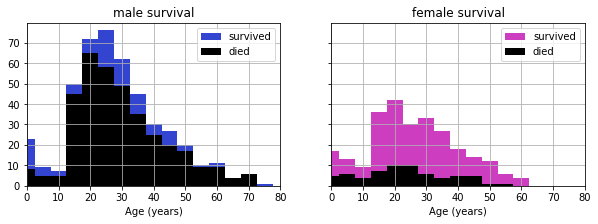

In [22]:
# We now plot the data.
bins = bins_[:-1]
fig, axes = plt.subplots(1, 2, figsize=(10, 3),
                         sharey=True)
for ax, sex, color in zip(axes, ('male', 'female'),
                          ('#3345d0', '#cc3dc0')):
    ax.bar(bins, S[sex], bottom=D[sex], color=color,
           width=5, label='survived')
    ax.bar(bins, D[sex], color='k',
           width=5, label='died')
    ax.set_xlim(0, 80)
    ax.set_xlabel("Age (years)")
    ax.set_title(sex + " survival")
    ax.grid(None)
    ax.legend()

In [23]:
# We split X and y into train and test datasets.
(X_train, X_test, y_train, y_test) = \
    ms.train_test_split(X, y, test_size=.05)

In [24]:
# We instanciate the classifier.
logreg = lm.LogisticRegression()

In [25]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.imshow(np.vstack((y_test, y_predicted)),
          interpolation='none', cmap='bone')
ax.set_axis_off()
ax.set_title("Actual and predicted survival outcomes "
             "on the test set")

Text(0.5, 1.0, 'Actual and predicted survival outcomes on the test set')

In [27]:
ms.cross_val_score(logreg, X, y)

array([0.76923077, 0.83216783, 0.77622378, 0.74825175, 0.8028169 ])

In [28]:
grid = ms.GridSearchCV(
    logreg, {'C': np.logspace(-5, 5, 200)}, n_jobs=4)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.23542864143224201}

In [29]:
ms.cross_val_score(grid.best_estimator_, X, y)

array([0.76223776, 0.82517483, 0.7972028 , 0.74825175, 0.80985915])